In [2]:
import sys
sys.path.append('/eos/home-i00/l/lkoller/SWAN_projects/commands/Lya_commands')

from Ltif import Lpicday, Lpic
import numpy as np
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn import datasets, metrics, svm

In [26]:
df1 = Lpicday('23_12_06').clusters_data()
df2 = Lpicday('23_12_07').clusters_data()
df3 = Lpicday('23_12_08').clusters_data()
df4 = Lpicday('23_12_14').clusters_data()

The clusters datafile for the date 23_12_06 already exists.


100%|██████████| 20/20 [00:00<00:00, 22.74it/s]


In [7]:
df

,file,cluster,pos,center,size,sum,coords
0,/eos/experiment/gbar/pgunpc/data/23_12_06/PCO-...,"[[[888, 892, 0], [880, 896, 904], [0, 900, 888...","[[81, 763], [89, 805], [92, 838], [94, 683], [...","[[1.0012804097311139, 1.0038412291933418], [1....","[7, 6, 6, 9, 7, 6, 8, 6, 7, 9, 8, 6, 7, 5, 6, ...","[6248, 5464, 5292, 8048, 6316, 5392, 7176, 534...","[[[0, 0, 1, 1, 1, 2, 2], [0, 1, 0, 1, 2, 1, 2]..."
1,/eos/experiment/gbar/pgunpc/data/23_12_06/PCO-...,"[[[888, 0], [880, 0], [896, 0], [880, 896]], [...","[[86, 669], [99, 658], [104, 680], [105, 714],...","[[1.8018018018018018, 0.2018018018018018], [0....","[5, 5, 9, 6, 9, 5, 5, 9, 8, 20, 7, 5, 6, 5, 9,...","[4440, 4472, 8104, 5452, 8016, 4524, 4440, 809...","[[[0, 1, 2, 3, 3], [0, 0, 0, 0, 1]], [[0, 0, 1..."
2,/eos/experiment/gbar/pgunpc/data/23_12_06/PCO-...,"[[[884, 0, 0], [876, 912, 900], [896, 888, 0]]...","[[78, 725], [99, 756], [102, 621], [103, 794],...","[[1.1680358476474981, 0.6721433905899925], [1....","[6, 6, 7, 5, 5, 5, 11, 7, 5, 5, 5, 5, 8, 5, 6,...","[5356, 5336, 6256, 4452, 4476, 4428, 9932, 620...","[[[0, 1, 1, 1, 2, 2], [0, 0, 1, 2, 0, 1]], [[0..."
3,/eos/experiment/gbar/pgunpc/data/23_12_06/PCO-...,"[[[888, 880, 896, 876], [0, 924, 920, 872], [8...","[[100, 648], [100, 654], [112, 555], [119, 701...","[[0.9110715873721654, 1.4899955535793685], [2....","[10, 24, 7, 9, 6, 5, 6, 5, 6, 10, 6, 5, 5, 9, ...","[8996, 21632, 6224, 8128, 5340, 4440, 5432, 44...","[[[0, 0, 0, 0, 1, 1, 1, 2, 2, 2], [0, 1, 2, 3,..."
4,/eos/experiment/gbar/pgunpc/data/23_12_06/PCO-...,"[[[912, 900, 900], [0, 892, 896]], [[0, 0, 876...","[[92, 756], [106, 754], [132, 570], [133, 669]...","[[0.3973333333333333, 1.1964444444444444], [1....","[5, 10, 7, 13, 5, 10, 7, 5, 6, 5, 6, 8, 22, 13...","[4500, 8908, 6132, 11632, 4444, 8964, 6256, 43...","[[[0, 0, 0, 1, 1], [0, 1, 2, 1, 2]], [[0, 1, 1..."
...,...,...,...,...,...,...,...
469,/eos/experiment/gbar/pgunpc/data/23_12_06/PCO-...,"[[[880, 0, 0, 884, 876, 0, 0], [0, 896, 0, 880...","[[91, 621], [126, 751], [234, 756], [298, 767]...","[[3.1857641776151673, 2.730750041576584], [2.8...","[25, 33, 32, 55, 58, 35, 56, 45, 27, 57, 58, 1...","[24052, 30980, 30496, 54760, 56952, 32024, 542...","[[[0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4..."
470,/eos/experiment/gbar/pgunpc/data/23_12_06/PCO-...,"[[[0, 0, 0, 0, 876, 0, 0, 900, 928, 872, 0, 0]...","[[242, 924], [274, 920], [350, 700], [362, 376...","[[5.00431588141602, 5.622668653342239], [2.571...","[79, 38, 19, 15, 47, 74, 173, 30, 52, 69, 47, ...","[77852, 36632, 17304, 13500, 44496, 73716, 175...","[[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2..."
471,/eos/experiment/gbar/pgunpc/data/23_12_06/PCO-...,"[[[0, 0, 872, 0, 892, 884, 900, 0], [0, 0, 872...","[[149, 585], [183, 794], [212, 782], [268, 619...","[[4.3460765981023615, 3.59803310478565], [4.14...","[59, 37, 31, 10, 60, 7, 66, 81, 81, 35, 26, 61...","[57756, 34604, 28904, 9020, 58524, 6384, 64868...","[[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2..."
472,/eos/experiment/gbar/pgunpc/data/23_12_06/PCO-...,"[[[0, 0, 0, 880, 876, 0, 0], [0, 0, 0, 872, 89...","[[170, 886], [213, 404], [269, 963], [281, 439...","[[3.986782786885246, 3.179098360655738], [2.95...","[41, 49, 19, 20, 42, 38, 58, 81, 11, 48, 32, 5...","[39040, 46784, 18204, 18232, 40132, 35344, 561...","[[[0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3..."


In [27]:
size1 = np.array([val for bal in list(df1['size']) for val in bal])
tot1 = np.array([val for bal in list(df1['sum']) for val in bal])

size2 = np.array([val for bal in list(df2['size']) for val in bal])
tot2 = np.array([val for bal in list(df2['sum']) for val in bal])

size3 = np.array([val for bal in list(df3['size']) for val in bal])
tot3 = np.array([val for bal in list(df3['sum']) for val in bal])

size4 = np.array([val for bal in list(df4['size']) for val in bal])
tot4 = np.array([val for bal in list(df4['sum']) for val in bal])

Text(0, 0.5, 'total sum of elements in cluster')

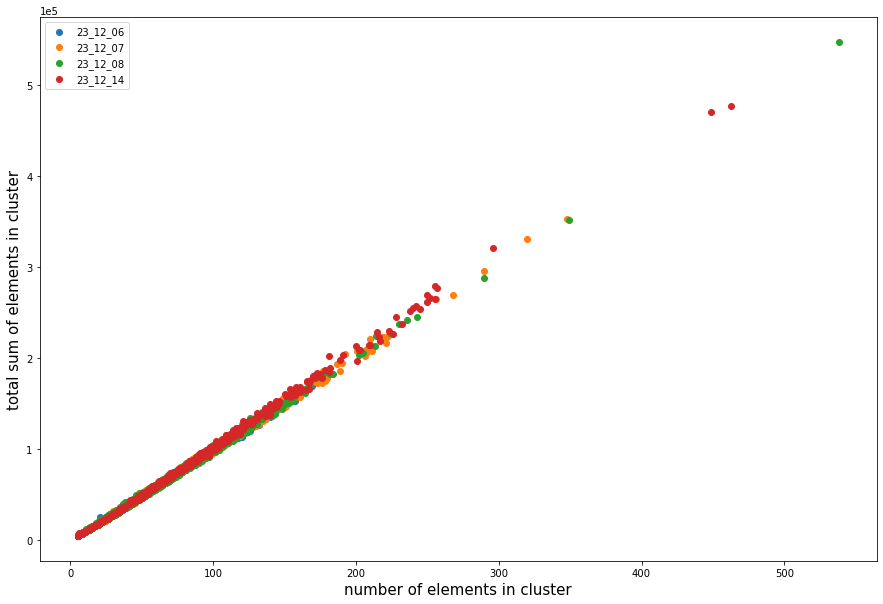

In [35]:
plt.figure(figsize = (15,10))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.scatter(size1, tot1, label = '23_12_06')
plt.scatter(size2, tot2, label = '23_12_07')
plt.scatter(size3, tot3, label = '23_12_08')
plt.scatter(size4, tot4, label = '23_12_14')

plt.legend(loc = 'best')
plt.xlabel('number of elements in cluster', fontsize = 15)
plt.ylabel('total sum of elements in cluster', fontsize = 15)

In [48]:
fit1 = np.polyfit(size1,tot1,1)
fit2 = np.polyfit(size2,tot2,1)
fit3 = np.polyfit(size3,tot3,1)
fit4 = np.polyfit(size4,tot4,1)

In [32]:
fit1

array([  990.73646676, -1095.40116577])

Text(0, 0.5, 'total sum of elements in cluster')

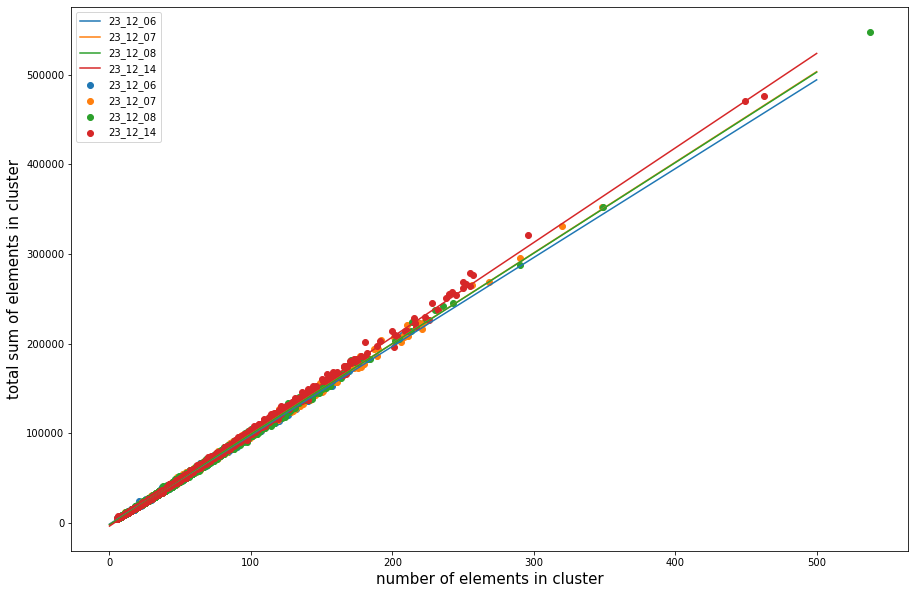

In [49]:
x = np.array([0,500])
plt.figure(figsize = (15,10))

plt.plot(x, fit1[0] * x + fit1[1], label = '23_12_06')
plt.plot(x, fit2[0] * x + fit2[1], label = '23_12_07')
plt.plot(x, fit3[0] * x + fit3[1], label = '23_12_08')
plt.plot(x, fit4[0] * x + fit4[1], label = '23_12_14')

plt.scatter(size1, tot1, label = '23_12_06')
plt.scatter(size2, tot2, label = '23_12_07')
plt.scatter(size3, tot3, label = '23_12_08')
plt.scatter(size4, tot4, label = '23_12_14')

plt.legend(loc = 'best')
plt.xlabel('number of elements in cluster', fontsize = 15)
plt.ylabel('total sum of elements in cluster', fontsize = 15)